In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [2]:
churn_data = pd.read_csv("/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")

In [3]:
churn_data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Customer Churn Prediction Tutorial
## A Complete Beginner's Guide to Machine Learning

---

## Section 1: Introduction

Welcome to this tutorial! We'll analyze customer churn for ABC Bank. **Churn** means when customers leave the bank. Our goal is to predict which customers might leave so the bank can take action to retain them.

### What You'll Learn:
- How to explore data (EDA)
- How to clean and prepare data
- How to build a machine learning model
- How to evaluate model performance

### Dataset Overview:
- **10 input features**: credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary
- **1 target variable**: churn (1 = left the bank, 0 = stayed)

---

## Code Section 1: Import Libraries

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import (classification_report, confusion_matrix, 
                              accuracy_score, roc_auc_score, roc_curve,
                              precision_recall_curve)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


---

## Section 2: Loading and First Look at Data

Now we'll load our dataset and take a quick peek at what we're working with.


In [5]:
# Load the dataset
df = pd.read_csv("/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")

print("=" * 70)
print("DATASET LOADED SUCCESSFULLY!")
print("=" * 70)

# Display basic information
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Show first 5 rows
print("First 5 Rows of Data:")
print(df.head())

# Show data types
print("\nData Types:")
print(df.dtypes)

# Show column names
print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

DATASET LOADED SUCCESSFULLY!

Dataset Shape: 10000 rows × 12 columns

First 5 Rows of Data:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Data Types:
customer_id       

---

## Section 3: Understanding Data Types

Let's understand what each column means:

| Column | Type | Description |
|--------|------|-------------|
| customer_id | Identifier | Unique ID (won't use for prediction) |
| credit_score | Numeric | Customer's credit score (300-850) |
| country | Categorical | France, Spain, or Germany |
| gender | Categorical | Male or Female |
| age | Numeric | Customer's age |
| tenure | Numeric | Years with the bank |
| balance | Numeric | Account balance |
| products_number | Numeric | Number of bank products |
| credit_card | Binary | Has credit card? (1=Yes, 0=No) |
| active_member | Binary | Is active? (1=Yes, 0=No) |
| estimated_salary | Numeric | Annual salary estimate |
| churn | Target | Left the bank? (1=Yes, 0=No) |

In [6]:
print("=" * 70)
print("STATISTICAL SUMMARY")
print("=" * 70)

# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe().round(2))

# Check for missing values
print("\nMissing Values Check:")
missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
    print("\nGreat! No missing values found.")
else:
    print(f"\nTotal missing values: {missing.sum()}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

STATISTICAL SUMMARY

Descriptive Statistics:
       customer_id  credit_score       age    tenure    balance  \
count     10000.00      10000.00  10000.00  10000.00   10000.00   
mean   15690940.57        650.53     38.92      5.01   76485.89   
std       71936.19         96.65     10.49      2.89   62397.41   
min    15565701.00        350.00     18.00      0.00       0.00   
25%    15628528.25        584.00     32.00      3.00       0.00   
50%    15690738.00        652.00     37.00      5.00   97198.54   
75%    15753233.75        718.00     44.00      7.00  127644.24   
max    15815690.00        850.00     92.00     10.00  250898.09   

       products_number  credit_card  active_member  estimated_salary    churn  
count         10000.00     10000.00       10000.00          10000.00  10000.0  
mean              1.53         0.71           0.52         100090.24      0.2  
std               0.58         0.46           0.50          57510.49      0.4  
min               1.00         

---

## Section 4: Exploratory Data Analysis (EDA)

EDA helps us understand patterns in our data. We'll create visualizations to see:
- How many customers churned vs stayed
- Which features are most related to churn
- Distribution of different variables

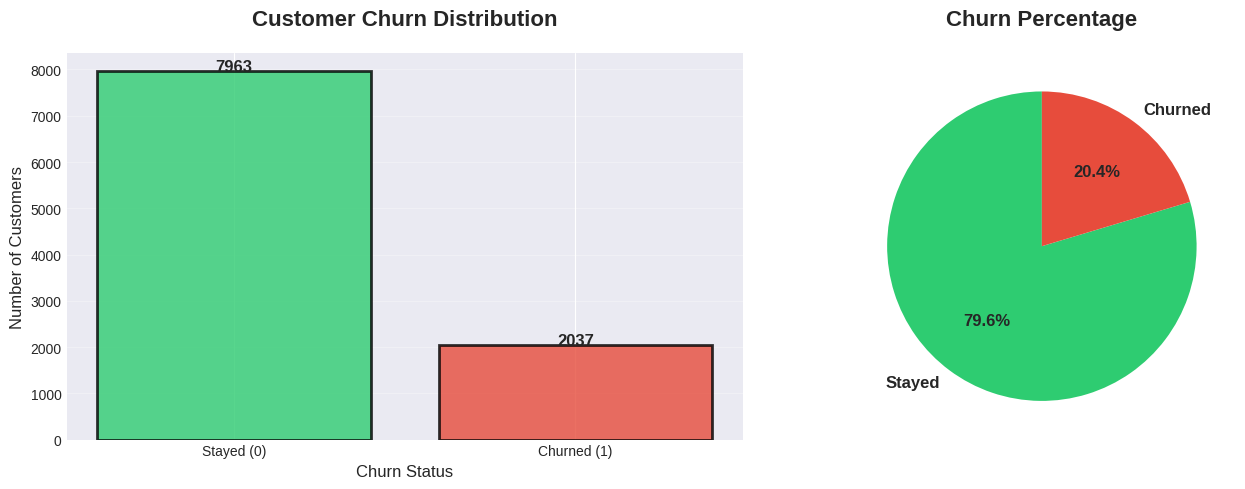

Churn Rate: 20.37%
   - Stayed: 7963 customers (79.6%)
   - Churned: 2037 customers (20.4%)


In [7]:
# Style 1: Clean and Professional
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn counts
churn_counts = df['churn'].value_counts()
axes[0].bar(['Stayed (0)', 'Churned (1)'], churn_counts.values, 
            color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=2)
axes[0].set_title('Customer Churn Distribution', fontsize=16, fontweight='bold', pad=20)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 1, str(v), ha='center', fontweight='bold', fontsize=12)

# Churn percentage
churn_pct = df['churn'].value_counts(normalize=True) * 100
colors_pie = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_pct, labels=['Stayed', 'Churned'], autopct='%1.1f%%',
            colors=colors_pie, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Churn Percentage', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('1_churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Churn Rate: {df['churn'].mean()*100:.2f}%")
print(f"   - Stayed: {churn_counts[0]} customers ({churn_pct[0]:.1f}%)")
print(f"   - Churned: {churn_counts[1]} customers ({churn_pct[1]:.1f}%)")

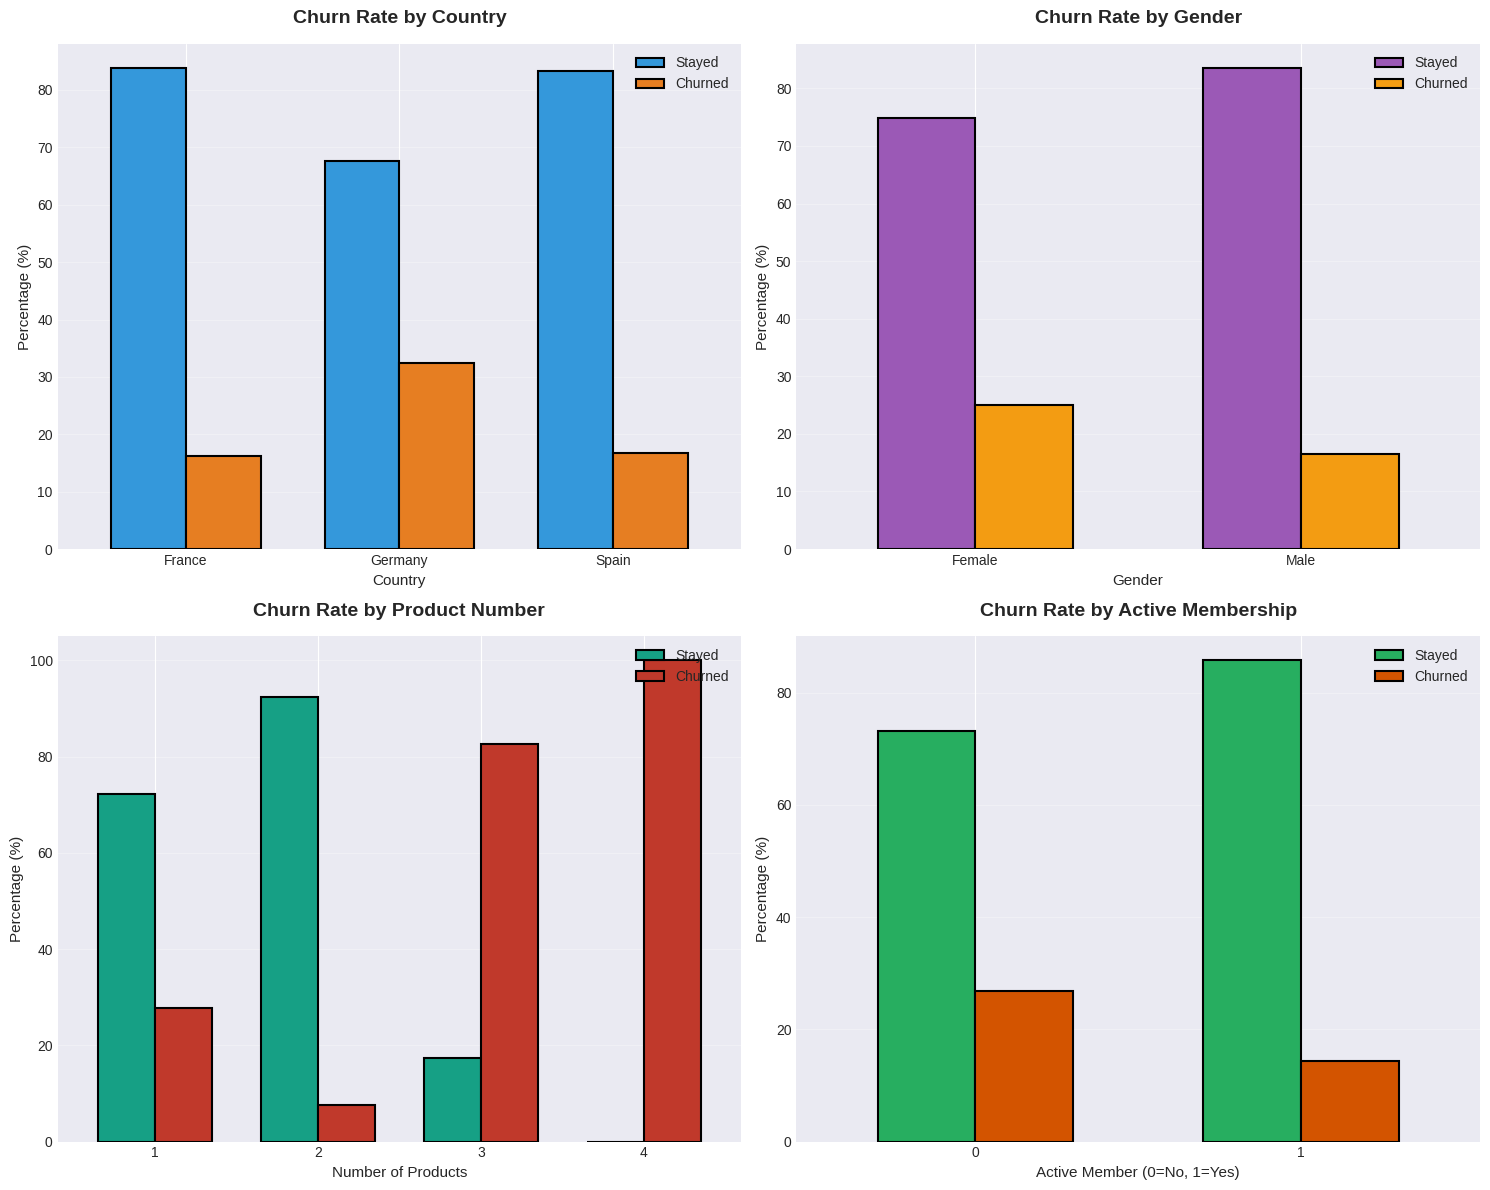

In [8]:
# Style 2: Vibrant and Colorful
plt.style.use('seaborn-v0_8-bright')

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Churn by Country
country_churn = pd.crosstab(df['country'], df['churn'], normalize='index') * 100
country_churn.plot(kind='bar', ax=axes[0, 0], color=['#3498db', '#e67e22'], 
                   width=0.7, edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Churn Rate by Country', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].set_xlabel('Country', fontsize=11)
axes[0, 0].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 0].legend(['Stayed', 'Churned'], loc='upper right')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Churn by Gender
gender_churn = pd.crosstab(df['gender'], df['churn'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=axes[0, 1], color=['#9b59b6', '#f39c12'],
                  width=0.6, edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].set_xlabel('Gender', fontsize=11)
axes[0, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 1].legend(['Stayed', 'Churned'], loc='upper right')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Churn by Number of Products
products_churn = pd.crosstab(df['products_number'], df['churn'], normalize='index') * 100
products_churn.plot(kind='bar', ax=axes[1, 0], color=['#16a085', '#c0392b'],
                    width=0.7, edgecolor='black', linewidth=1.5)
axes[1, 0].set_title('Churn Rate by Product Number', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_xlabel('Number of Products', fontsize=11)
axes[1, 0].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 0].legend(['Stayed', 'Churned'], loc='upper right')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Churn by Active Membership
active_churn = pd.crosstab(df['active_member'], df['churn'], normalize='index') * 100
active_churn.plot(kind='bar', ax=axes[1, 1], color=['#27ae60', '#d35400'],
                  width=0.6, edgecolor='black', linewidth=1.5)
axes[1, 1].set_title('Churn Rate by Active Membership', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].set_xlabel('Active Member (0=No, 1=Yes)', fontsize=11)
axes[1, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 1].legend(['Stayed', 'Churned'], loc='upper right')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('2_categorical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

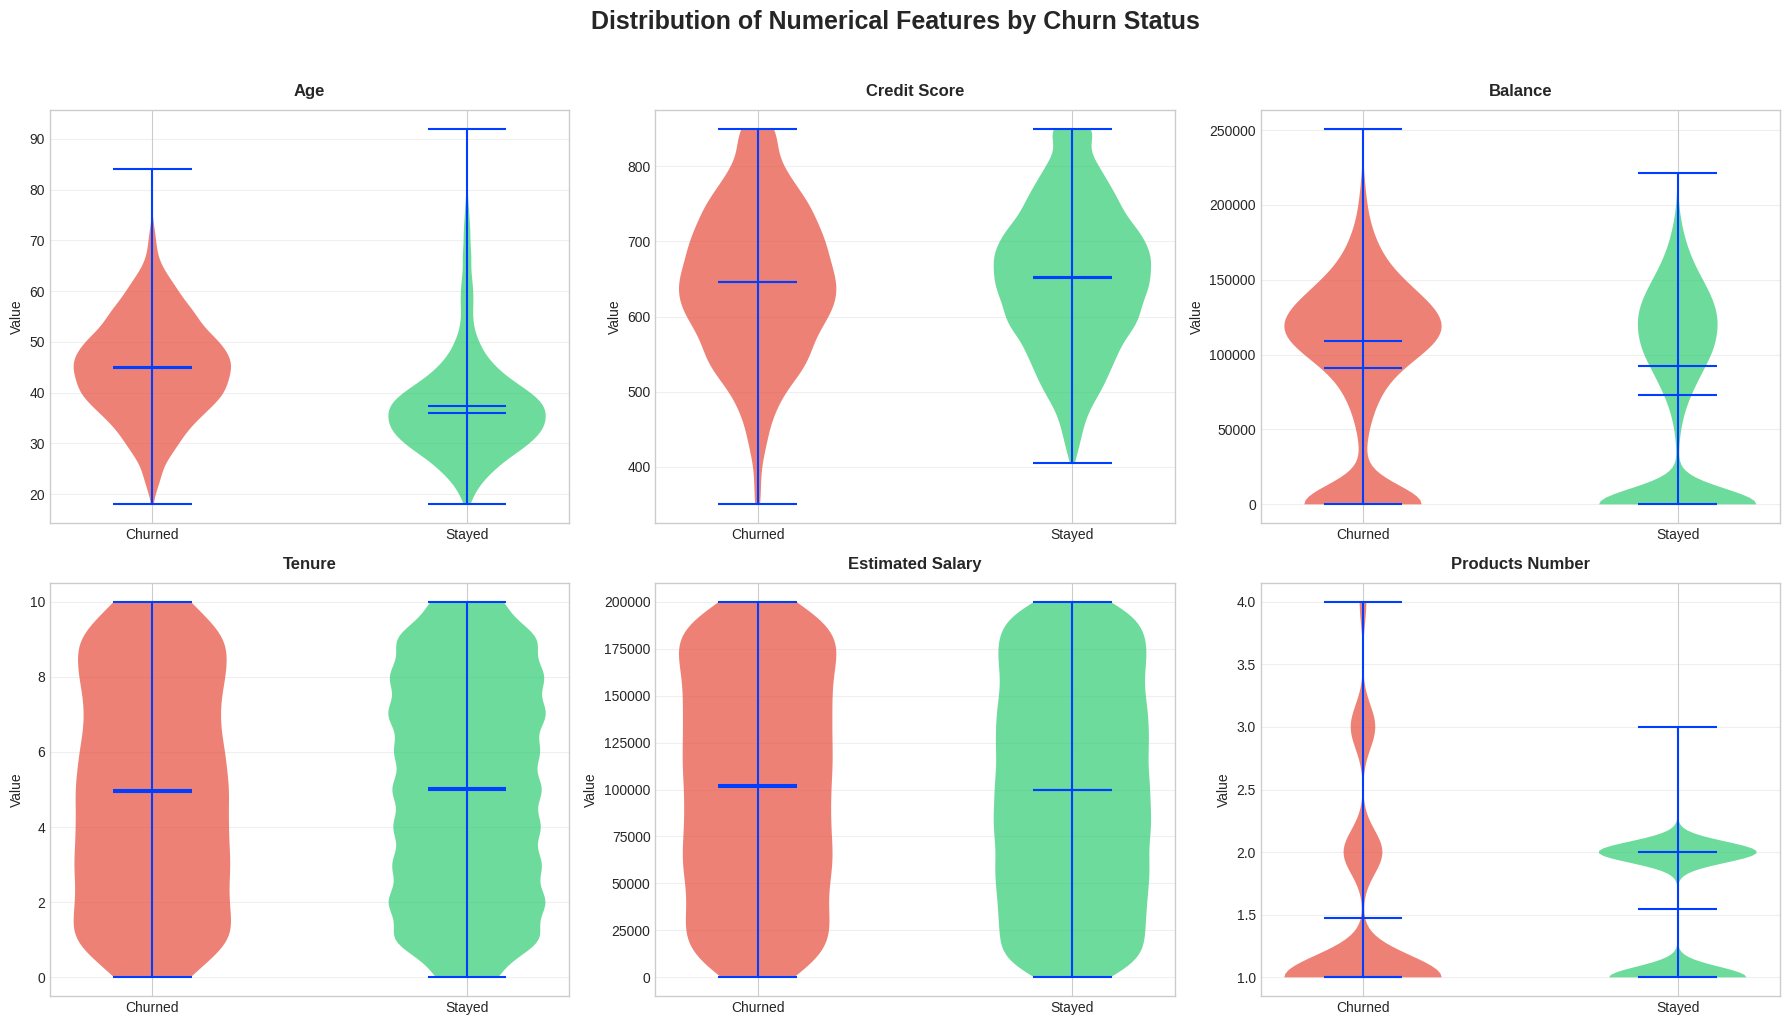

In [9]:
# Style 3: Elegant Violin Plots
plt.style.use('seaborn-v0_8-whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features by Churn Status', 
             fontsize=18, fontweight='bold', y=1.02)

numerical_features = ['age', 'credit_score', 'balance', 'tenure', 
                      'estimated_salary', 'products_number']
colors = ['#e74c3c', '#2ecc71']

for idx, feature in enumerate(numerical_features):
    row = idx // 3
    col = idx % 3
    
    # Create violin plot
    parts = axes[row, col].violinplot(
        [df[df['churn']==1][feature].dropna(), df[df['churn']==0][feature].dropna()],
        positions=[1, 2],
        showmeans=True,
        showmedians=True
    )
    
    # Color the violin plots
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}', 
                             fontsize=12, fontweight='bold', pad=10)
    axes[row, col].set_xticks([1, 2])
    axes[row, col].set_xticklabels(['Churned', 'Stayed'])
    axes[row, col].set_ylabel('Value', fontsize=10)
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('3_numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

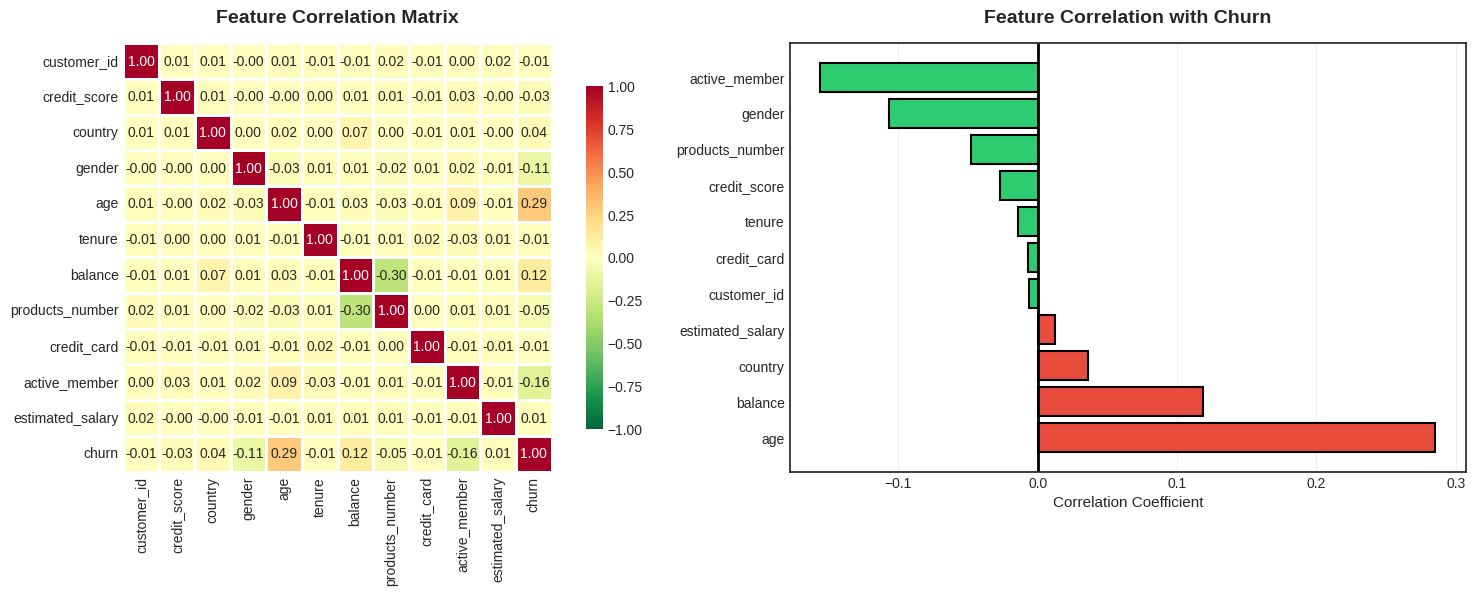


Top 5 Features Correlated with Churn:
age                 0.285323
balance             0.118533
country             0.035943
estimated_salary    0.012097
customer_id        -0.006248
Name: churn, dtype: float64


In [10]:
# Style 4: Modern Heatmap
plt.style.use('seaborn-v0_8-white')

# Create a copy and encode categorical variables for correlation
df_corr = df.copy()
df_corr['gender'] = LabelEncoder().fit_transform(df_corr['gender'])
df_corr['country'] = LabelEncoder().fit_transform(df_corr['country'])

# Calculate correlation with target
correlation_with_churn = df_corr.corr()['churn'].sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full correlation heatmap
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[0], vmin=-1, vmax=1)
axes[0].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=15)

# Correlation with churn
colors_bar = ['#e74c3c' if x > 0 else '#2ecc71' for x in correlation_with_churn.drop('churn').values]
axes[1].barh(range(len(correlation_with_churn)-1), 
             correlation_with_churn.drop('churn').values,
             color=colors_bar, edgecolor='black', linewidth=1.5)
axes[1].set_yticks(range(len(correlation_with_churn)-1))
axes[1].set_yticklabels(correlation_with_churn.drop('churn').index)
axes[1].set_xlabel('Correlation Coefficient', fontsize=11)
axes[1].set_title('Feature Correlation with Churn', fontsize=14, fontweight='bold', pad=15)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=2)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('4_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 Features Correlated with Churn:")
print(correlation_with_churn.drop('churn').head())

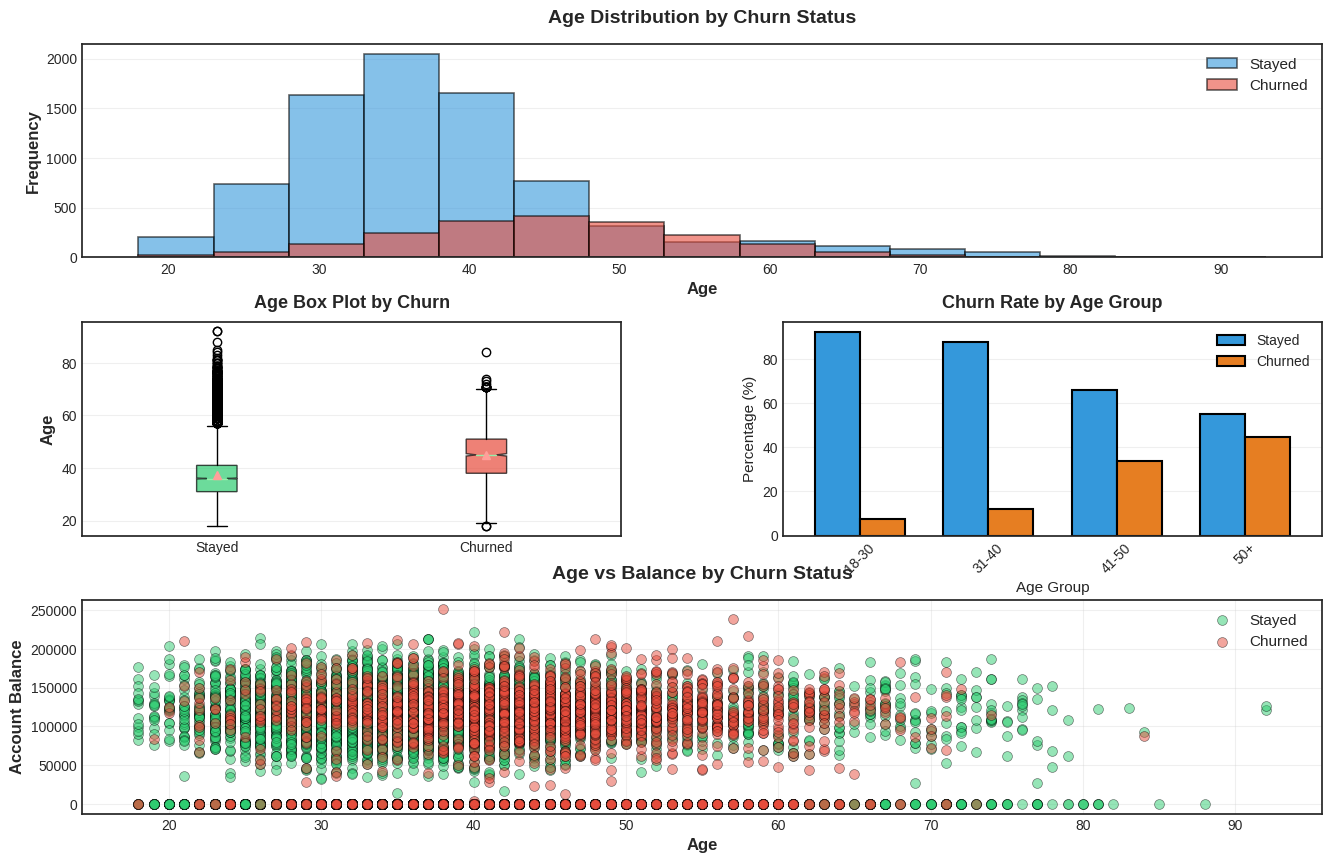

In [11]:
# Style 5: Sophisticated Multi-panel Analysis
plt.style.use('seaborn-v0_8-pastel')

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Histogram with KDE
ax1 = fig.add_subplot(gs[0, :])
bins = np.arange(df['age'].min(), df['age'].max() + 5, 5)
ax1.hist(df[df['churn']==0]['age'], bins=bins, alpha=0.6, label='Stayed', 
         color='#3498db', edgecolor='black', linewidth=1.2)
ax1.hist(df[df['churn']==1]['age'], bins=bins, alpha=0.6, label='Churned', 
         color='#e74c3c', edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Age', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Age Distribution by Churn Status', fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=11)
ax1.grid(axis='y', alpha=0.3)

# 2. Box plot
ax2 = fig.add_subplot(gs[1, 0])
bp = ax2.boxplot([df[df['churn']==0]['age'], df[df['churn']==1]['age']],
                  labels=['Stayed', 'Churned'],
                  patch_artist=True,
                  notch=True,
                  showmeans=True)
colors_box = ['#2ecc71', '#e74c3c']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.set_ylabel('Age', fontsize=12, fontweight='bold')
ax2.set_title('Age Box Plot by Churn', fontsize=13, fontweight='bold', pad=10)
ax2.grid(axis='y', alpha=0.3)

# 3. Age groups
ax3 = fig.add_subplot(gs[1, 1])
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 100], 
                         labels=['18-30', '31-40', '41-50', '50+'])
age_group_churn = pd.crosstab(df['age_group'], df['churn'], normalize='index') * 100
age_group_churn.plot(kind='bar', ax=ax3, color=['#3498db', '#e67e22'],
                     width=0.7, edgecolor='black', linewidth=1.5)
ax3.set_title('Churn Rate by Age Group', fontsize=13, fontweight='bold', pad=10)
ax3.set_xlabel('Age Group', fontsize=11)
ax3.set_ylabel('Percentage (%)', fontsize=11)
ax3.legend(['Stayed', 'Churned'], loc='upper right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.grid(axis='y', alpha=0.3)

# 4. Scatter plot: Age vs Balance
ax4 = fig.add_subplot(gs[2, :])
scatter1 = ax4.scatter(df[df['churn']==0]['age'], df[df['churn']==0]['balance'],
                       alpha=0.5, s=50, c='#2ecc71', label='Stayed', edgecolors='black', linewidth=0.5)
scatter2 = ax4.scatter(df[df['churn']==1]['age'], df[df['churn']==1]['balance'],
                       alpha=0.5, s=50, c='#e74c3c', label='Churned', edgecolors='black', linewidth=0.5)
ax4.set_xlabel('Age', fontsize=12, fontweight='bold')
ax4.set_ylabel('Account Balance', fontsize=12, fontweight='bold')
ax4.set_title('Age vs Balance by Churn Status', fontsize=14, fontweight='bold', pad=15)
ax4.legend(fontsize=11)
ax4.grid(alpha=0.3)

plt.savefig('5_age_detailed_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Drop temporary column
df = df.drop('age_group', axis=1)

---

## Section 5: Key Insights from EDA

Based on our visualizations, we discovered:

### Important Findings:
1. **Churn Rate**: About 20-25% of customers have churned
2. **Age**: Older customers (45+) seem to churn more
3. **Geography**: Germany might have higher churn rates
4. **Products**: Customers with 3-4 products have unusual patterns
5. **Activity**: Inactive members are more likely to churn
6. **Balance**: High-balance customers show interesting patterns

### Why This Matters:
Understanding these patterns helps us:
- Identify at-risk customers
- Focus retention efforts
- Build better prediction models

---

## Section 6: Data Preprocessing

Before training our model, we need to prepare the data:

1. **Remove unnecessary columns** (customer_id)
2. **Encode categorical variables** (convert text to numbers)
3. **Split data** into training and testing sets
4. **Scale features** (normalize numeric values)

---

In [12]:
print("=" * 70)
print("DATA PREPROCESSING")
print("=" * 70)

# Create a copy to preserve original data
df_clean = df.copy()

# Step 1: Remove customer_id (not useful for prediction)
df_clean = df_clean.drop('customer_id', axis=1)
print("\nStep 1: Removed 'customer_id' column")

# Step 2: Encode Gender (Binary: Female=0, Male=1)
le_gender = LabelEncoder()
df_clean['gender'] = le_gender.fit_transform(df_clean['gender'])
print("Step 2: Encoded 'gender' -> Female=0, Male=1")

# Step 3: One-Hot Encode Country (Creates dummy variables)
# drop_first=True avoids multicollinearity
df_clean = pd.get_dummies(df_clean, columns=['country'], prefix='country', drop_first=True)
print("Step 3: One-hot encoded 'country'")
print(f"   New columns: {[col for col in df_clean.columns if 'country' in col]}")

# Display cleaned dataset info
print(f"\nCleaned Dataset Shape: {df_clean.shape}")
print(f"\nFinal Feature Columns ({len(df_clean.columns)-1} features):")
for i, col in enumerate([c for c in df_clean.columns if c != 'churn'], 1):
    print(f"   {i}. {col}")

DATA PREPROCESSING

Step 1: Removed 'customer_id' column
Step 2: Encoded 'gender' -> Female=0, Male=1
Step 3: One-hot encoded 'country'
   New columns: ['country_Germany', 'country_Spain']

Cleaned Dataset Shape: (10000, 12)

Final Feature Columns (11 features):
   1. credit_score
   2. gender
   3. age
   4. tenure
   5. balance
   6. products_number
   7. credit_card
   8. active_member
   9. estimated_salary
   10. country_Germany
   11. country_Spain


In [13]:
print("\n" + "=" * 70)
print("SPLITTING DATA")
print("=" * 70)

# Separate features (X) and target (y)
X = df_clean.drop('churn', axis=1)
y = df_clean['churn']

print(f"\nFeatures (X): {X.shape} → {X.shape[1]} features × {X.shape[0]} samples")
print(f"Target (y): {y.shape} → {y.shape[0]} labels")

# Split into training (80%) and testing (20%) sets
# stratify=y ensures both sets have same churn proportion
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Maintain churn ratio
)

print(f"\nTraining Set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Testing Set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# Verify stratification worked
print(f"\nChurn Distribution Check:")
print(f"   Training: {y_train.mean()*100:.2f}% churned")
print(f"   Testing: {y_test.mean()*100:.2f}% churned")
print(f"   Original: {y.mean()*100:.2f}% churned")


SPLITTING DATA

Features (X): (10000, 11) → 11 features × 10000 samples
Target (y): (10000,) → 10000 labels

Training Set: 8000 samples (80.0%)
Testing Set: 2000 samples (20.0%)

Churn Distribution Check:
   Training: 20.38% churned
   Testing: 20.35% churned
   Original: 20.37% churned


In [14]:
print("\n" + "=" * 70)
print("FEATURE SCALING")
print("=" * 70)

# StandardScaler: transforms features to have mean=0 and std=1
# This helps models perform better and converge faster
scaler = StandardScaler()

# Fit on training data only (avoid data leakage!)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler")
print("   - Mean ≈ 0")
print("   - Standard Deviation ≈ 1")

# Show example of scaling
print(f"\nExample - Credit Score before scaling:")
print(f"   Training: mean={X_train['credit_score'].mean():.2f}, std={X_train['credit_score'].std():.2f}")
print(f"\nExample - Credit Score after scaling:")
print(f"   Training: mean={X_train_scaled[:, X.columns.get_loc('credit_score')].mean():.2f}, " +
      f"std={X_train_scaled[:, X.columns.get_loc('credit_score')].std():.2f}")

print("\nData is now ready for machine learning!")


FEATURE SCALING

Features scaled using StandardScaler
   - Mean ≈ 0
   - Standard Deviation ≈ 1

Example - Credit Score before scaling:
   Training: mean=650.75, std=96.60

Example - Credit Score after scaling:
   Training: mean=-0.00, std=1.00

Data is now ready for machine learning!


---

## Section 7: Model Training

We'll train **3 different models** and compare them:

1. **Logistic Regression**: Simple, interpretable baseline
2. **Decision Tree**: Easy to visualize and understand
3. **Random Forest**: Powerful ensemble method (often best performer)

---

In [15]:
print("\n" + "=" * 70)
print("MODEL TRAINING")
print("=" * 70)

# Dictionary to store models
models = {}
predictions = {}
probabilities = {}

# 1. Logistic Regression
print("\nTraining Model 1: Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model
predictions['Logistic Regression'] = lr_model.predict(X_test_scaled)
probabilities['Logistic Regression'] = lr_model.predict_proba(X_test_scaled)[:, 1]
print("Complete!")

# 2. Decision Tree
print("\nTraining Model 2: Decision Tree...")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)
models['Decision Tree'] = dt_model
predictions['Decision Tree'] = dt_model.predict(X_test_scaled)
probabilities['Decision Tree'] = dt_model.predict_proba(X_test_scaled)[:, 1]
print("Complete!")

# 3. Random Forest
print("\nTraining Model 3: Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, 
                                  random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_model.predict(X_test_scaled)
probabilities['Random Forest'] = rf_model.predict_proba(X_test_scaled)[:, 1]
print("Complete!")

print("\nAll models trained successfully!")


MODEL TRAINING

Training Model 1: Logistic Regression...
Complete!

Training Model 2: Decision Tree...
Complete!

Training Model 3: Random Forest...
Complete!

All models trained successfully!


---

## Section 8: Model Evaluation

Now we'll evaluate how well each model performs using:
- **Accuracy**: % of correct predictions
- **Precision**: Of predicted churns, how many were correct?
- **Recall**: Of actual churns, how many did we catch?
- **ROC-AUC**: Overall model quality (0.5=random, 1.0=perfect)

---

In [16]:
print("\n" + "=" * 70)
print("MODEL EVALUATION & COMPARISON")
print("=" * 70)

# Create comparison dataframe
results = []

for model_name in models.keys():
    accuracy = accuracy_score(y_test, predictions[model_name])
    roc_auc = roc_auc_score(y_test, probabilities[model_name])
    
    results.append({
        'Model': model_name,
        'Accuracy': f"{accuracy*100:.2f}%",
        'ROC-AUC': f"{roc_auc:.4f}"
    })

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))

# Find best model
best_model_name = max(probabilities.keys(), 
                      key=lambda x: roc_auc_score(y_test, probabilities[x]))
print(f"\nBest Model: {best_model_name}")


MODEL EVALUATION & COMPARISON

Model Performance Summary:
              Model Accuracy ROC-AUC
Logistic Regression   80.80%  0.7748
      Decision Tree   85.60%  0.8423
      Random Forest   86.50%  0.8636

Best Model: Random Forest


In [17]:
print("\n" + "=" * 70)
print(f"DETAILED RESULTS: {best_model_name}")
print("=" * 70)

best_pred = predictions[best_model_name]
best_proba = probabilities[best_model_name]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_pred, 
                          target_names=['Stayed (0)', 'Churned (1)'],
                          digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred)
print("\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                Stayed  Churned")
print(f"Actual Stayed    {cm[0,0]:4d}    {cm[0,1]:4d}")
print(f"       Churned   {cm[1,0]:4d}    {cm[1,1]:4d}")

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print(f"\nAdditional Metrics:")
print(f"   True Negatives (TN): {tn}")
print(f"   False Positives (FP): {fp}")
print(f"   False Negatives (FN): {fn}")
print(f"   True Positives (TP): {tp}")
print(f"   Specificity: {specificity:.3f} (correct 'Stayed' predictions)")
print(f"   Sensitivity/Recall: {sensitivity:.3f} (correct 'Churned' predictions)")


DETAILED RESULTS: Random Forest

Classification Report:
              precision    recall  f1-score   support

  Stayed (0)      0.871     0.974     0.920      1593
 Churned (1)      0.813     0.437     0.569       407

    accuracy                          0.865      2000
   macro avg      0.842     0.706     0.744      2000
weighted avg      0.859     0.865     0.848      2000


Confusion Matrix:
                 Predicted
                Stayed  Churned
Actual Stayed    1552      41
       Churned    229     178

Additional Metrics:
   True Negatives (TN): 1552
   False Positives (FP): 41
   False Negatives (FN): 229
   True Positives (TP): 178
   Specificity: 0.974 (correct 'Stayed' predictions)
   Sensitivity/Recall: 0.437 (correct 'Churned' predictions)


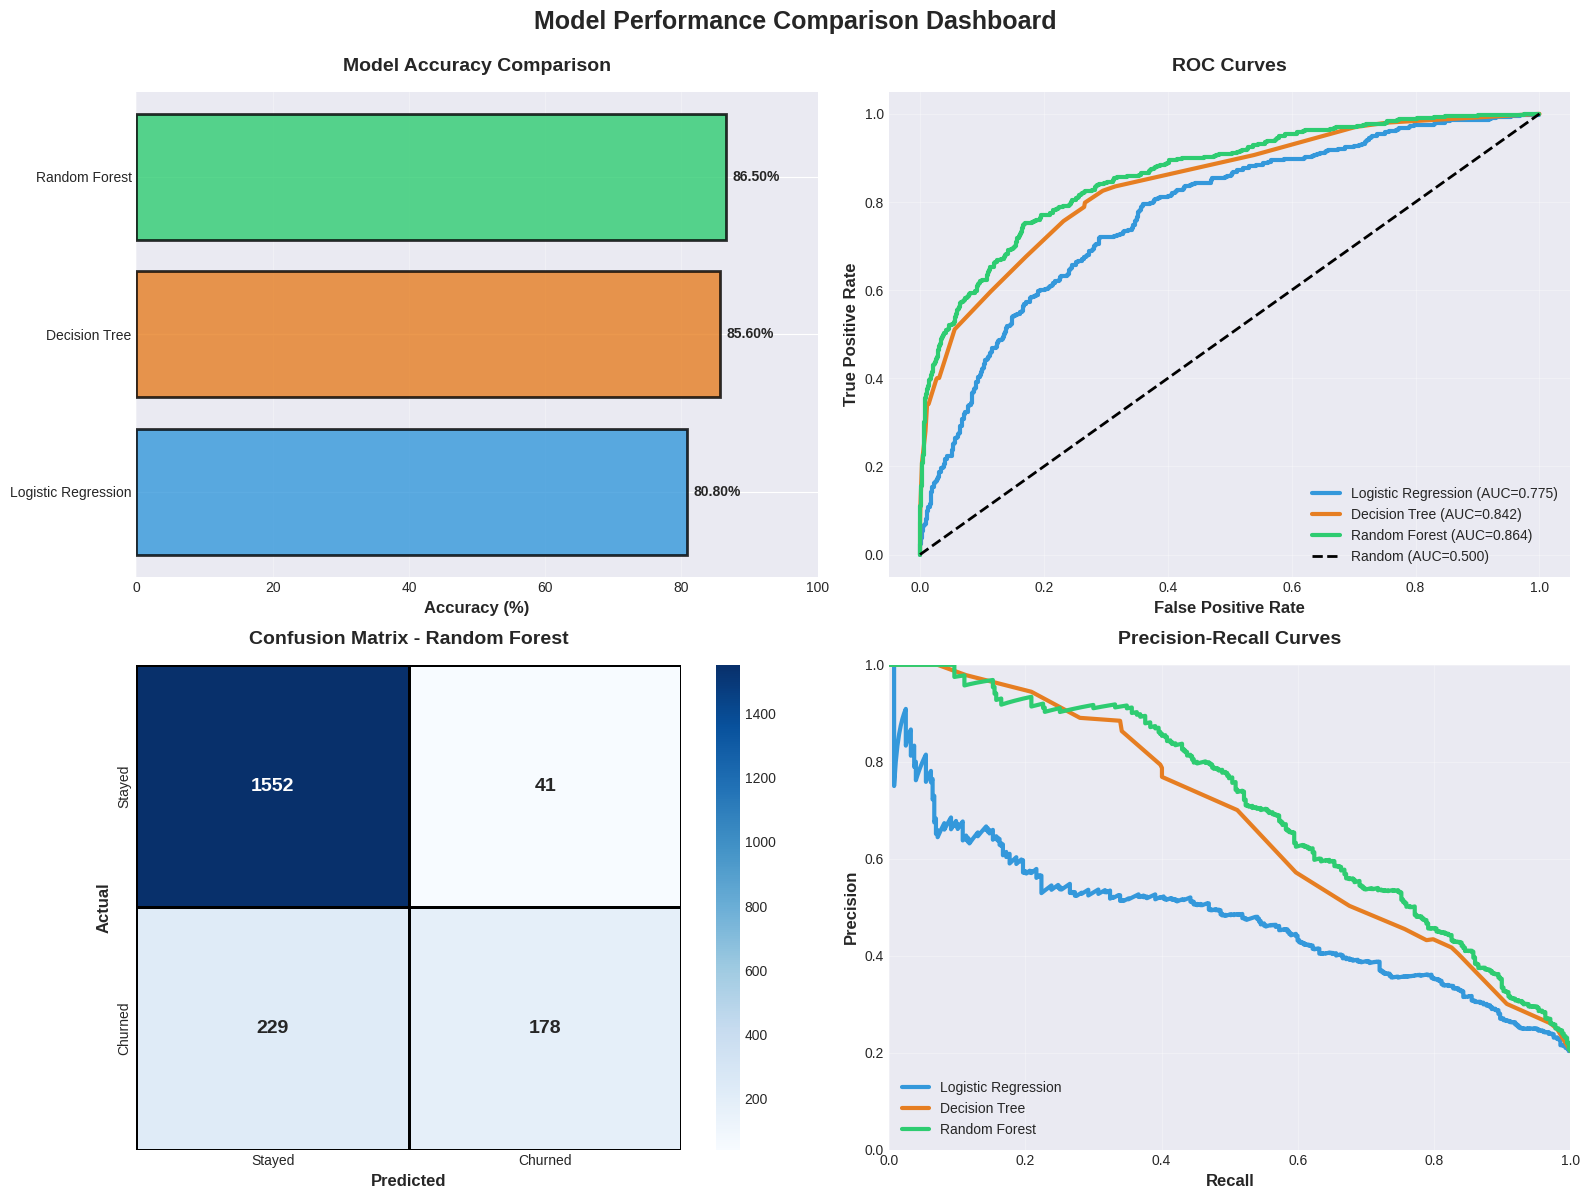

In [18]:
# Style 6: Professional Comparison Dashboard
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)

# 1. Accuracy Comparison
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, predictions[m]) * 100 for m in model_names]
colors_acc = ['#3498db', '#e67e22', '#2ecc71']

axes[0, 0].barh(model_names, accuracies, color=colors_acc, 
                edgecolor='black', linewidth=2, alpha=0.8)
axes[0, 0].set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold', pad=15)
axes[0, 0].set_xlim([0, 100])
for i, v in enumerate(accuracies):
    axes[0, 0].text(v + 1, i, f'{v:.2f}%', va='center', fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. ROC Curves
for model_name, color in zip(model_names, colors_acc):
    fpr, tpr, _ = roc_curve(y_test, probabilities[model_name])
    auc_score = roc_auc_score(y_test, probabilities[model_name])
    axes[0, 1].plot(fpr, tpr, color=color, lw=3, 
                    label=f'{model_name} (AUC={auc_score:.3f})')

axes[0, 1].plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC=0.500)')
axes[0, 1].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
axes[0, 1].set_title('ROC Curves', fontsize=14, fontweight='bold', pad=15)
axes[0, 1].legend(loc='lower right', fontsize=10)
axes[0, 1].grid(alpha=0.3)

# 3. Confusion Matrix for Best Model
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Stayed', 'Churned'],
            yticklabels=['Stayed', 'Churned'],
            ax=axes[1, 0], linewidths=2, linecolor='black',
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
axes[1, 0].set_title(f'Confusion Matrix - {best_model_name}', 
                     fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Predicted', fontsize=12, fontweight='bold')

# 4. Precision-Recall Curve
for model_name, color in zip(model_names, colors_acc):
    precision, recall, _ = precision_recall_curve(y_test, probabilities[model_name])
    axes[1, 1].plot(recall, precision, color=color, lw=3, label=model_name)

axes[1, 1].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Precision', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Precision-Recall Curves', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].legend(loc='lower left', fontsize=10)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xlim([0, 1])
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('6_model_comparison_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

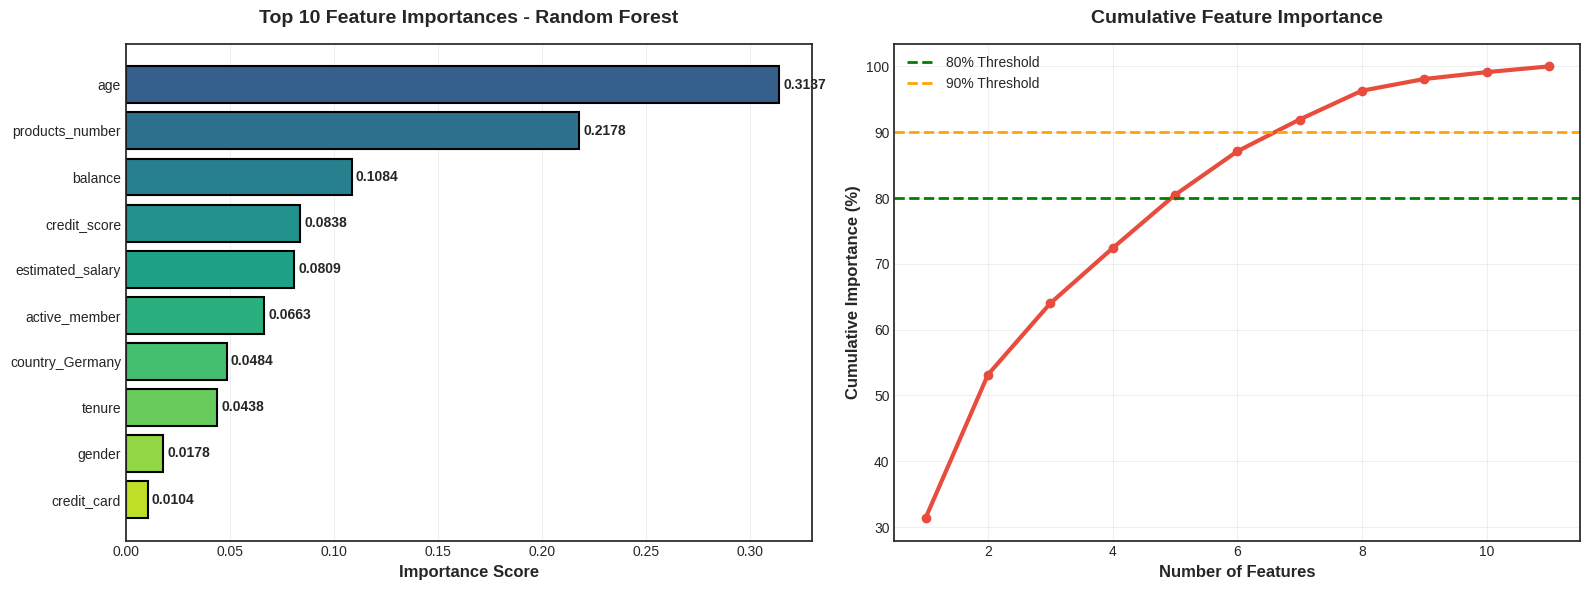


Top 5 Most Important Features:
   age: 0.3137
   products_number: 0.2178
   balance: 0.1084
   credit_score: 0.0838
   estimated_salary: 0.0809


In [19]:
# Style 7: Gradient Feature Importance
plt.style.use('seaborn-v0_8-white')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 10 features
top10 = rf_importance.head(10)
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(top10)))

axes[0].barh(range(len(top10)), top10['importance'], 
             color=colors_gradient, edgecolor='black', linewidth=1.5)
axes[0].set_yticks(range(len(top10)))
axes[0].set_yticklabels(top10['feature'])
axes[0].set_xlabel('Importance Score', fontsize=12, fontweight='bold')
axes[0].set_title('Top 10 Feature Importances - Random Forest', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top10['importance']):
    axes[0].text(v + 0.002, i, f'{v:.4f}', va='center', fontweight='bold')

# Cumulative importance
rf_importance['cumulative'] = rf_importance['importance'].cumsum()
axes[1].plot(range(1, len(rf_importance)+1), 
             rf_importance['cumulative'].values * 100,
             color='#e74c3c', linewidth=3, marker='o', markersize=6)
axes[1].axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% Threshold')
axes[1].axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% Threshold')
axes[1].set_xlabel('Number of Features', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cumulative Importance (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold', pad=15)
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('7_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 5 Most Important Features:")
for idx, row in rf_importance.head(5).iterrows():
    print(f"   {row['feature']}: {row['importance']:.4f}")

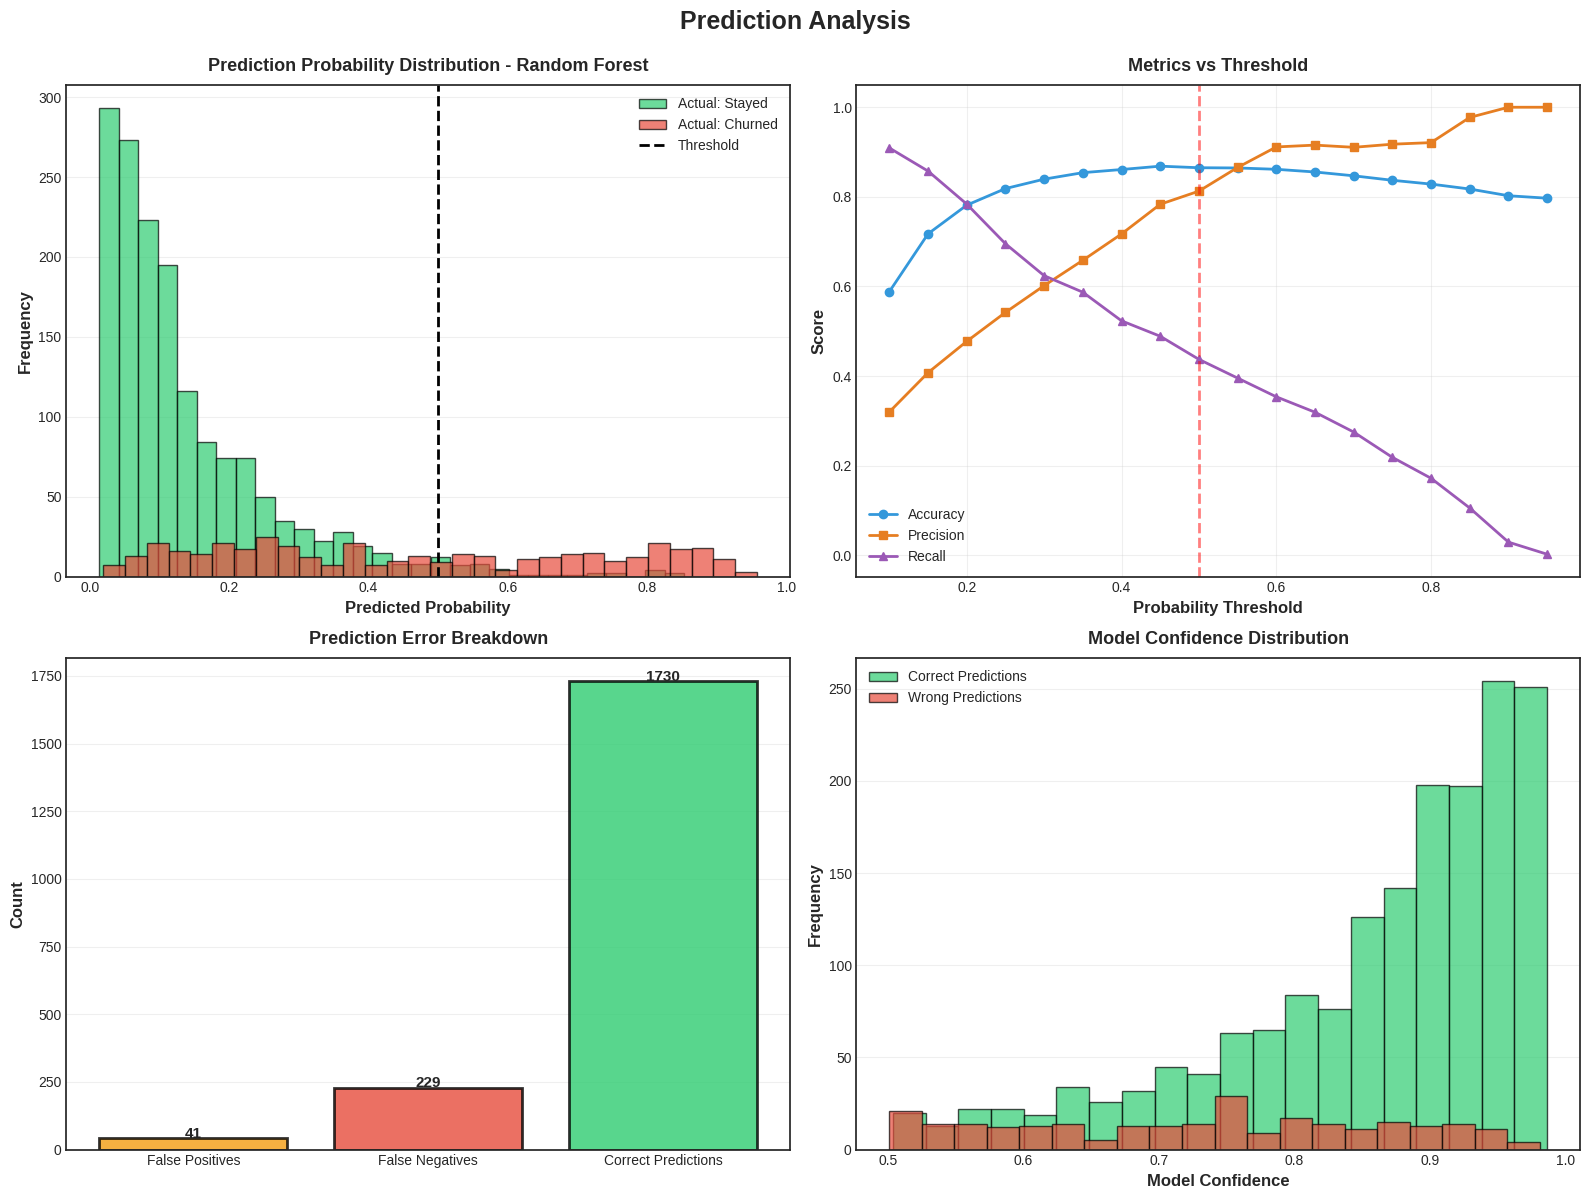


Error Analysis:
   False Positives: 41 (predicted churn but stayed)
   False Negatives: 229 (predicted stay but churned)
   Correct Predictions: 1730


In [20]:
# Style 8: Prediction Distribution
plt.style.use('seaborn-v0_8-pastel')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Prediction Analysis', fontsize=18, fontweight='bold', y=0.995)

# 1. Prediction Distribution for Best Model
axes[0, 0].hist(probabilities[best_model_name][y_test==0], bins=30, 
                alpha=0.7, color='#2ecc71', label='Actual: Stayed', 
                edgecolor='black', linewidth=1)
axes[0, 0].hist(probabilities[best_model_name][y_test==1], bins=30, 
                alpha=0.7, color='#e74c3c', label='Actual: Churned',
                edgecolor='black', linewidth=1)
axes[0, 0].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Threshold')
axes[0, 0].set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Prediction Probability Distribution - {best_model_name}', 
                     fontsize=13, fontweight='bold', pad=10)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Threshold Analysis
thresholds = np.arange(0.1, 1.0, 0.05)
accuracies_thresh = []
precisions_thresh = []
recalls_thresh = []

for thresh in thresholds:
    pred_thresh = (probabilities[best_model_name] >= thresh).astype(int)
    accuracies_thresh.append(accuracy_score(y_test, pred_thresh))
    
    # Calculate precision and recall
    cm_thresh = confusion_matrix(y_test, pred_thresh)
    if cm_thresh.shape == (2, 2):
        tn, fp, fn, tp = cm_thresh.ravel()
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        precisions_thresh.append(precision)
        recalls_thresh.append(recall)
    else:
        precisions_thresh.append(0)
        recalls_thresh.append(0)

axes[0, 1].plot(thresholds, accuracies_thresh, 'o-', color='#3498db', 
                linewidth=2, markersize=6, label='Accuracy')
axes[0, 1].plot(thresholds, precisions_thresh, 's-', color='#e67e22', 
                linewidth=2, markersize=6, label='Precision')
axes[0, 1].plot(thresholds, recalls_thresh, '^-', color='#9b59b6', 
                linewidth=2, markersize=6, label='Recall')
axes[0, 1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, alpha=0.5)
axes[0, 1].set_xlabel('Probability Threshold', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Metrics vs Threshold', fontsize=13, fontweight='bold', pad=10)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(alpha=0.3)

# 3. Error Analysis - False Positives vs False Negatives
fp_indices = np.where((best_pred == 1) & (y_test.values == 0))[0]
fn_indices = np.where((best_pred == 0) & (y_test.values == 1))[0]

error_data = pd.DataFrame({
    'Error Type': ['False Positives', 'False Negatives', 'Correct Predictions'],
    'Count': [len(fp_indices), len(fn_indices), 
              len(y_test) - len(fp_indices) - len(fn_indices)]
})

colors_error = ['#f39c12', '#e74c3c', '#2ecc71']
axes[1, 0].bar(error_data['Error Type'], error_data['Count'], 
               color=colors_error, edgecolor='black', linewidth=2, alpha=0.8)
axes[1, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Prediction Error Breakdown', fontsize=13, fontweight='bold', pad=10)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(error_data['Count']):
    axes[1, 0].text(i, v + 0.5, str(v), ha='center', fontweight='bold', fontsize=11)

# 4. Model Confidence Distribution
confidence = np.maximum(probabilities[best_model_name], 
                       1 - probabilities[best_model_name])
correct_mask = (best_pred == y_test.values)

axes[1, 1].hist(confidence[correct_mask], bins=20, alpha=0.7, 
                color='#2ecc71', label='Correct Predictions',
                edgecolor='black', linewidth=1)
axes[1, 1].hist(confidence[~correct_mask], bins=20, alpha=0.7, 
                color='#e74c3c', label='Wrong Predictions',
                edgecolor='black', linewidth=1)
axes[1, 1].set_xlabel('Model Confidence', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Model Confidence Distribution', fontsize=13, fontweight='bold', pad=10)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('8_prediction_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nError Analysis:")
print(f"   False Positives: {len(fp_indices)} (predicted churn but stayed)")
print(f"   False Negatives: {len(fn_indices)} (predicted stay but churned)")
print(f"   Correct Predictions: {len(y_test) - len(fp_indices) - len(fn_indices)}")

---
## Section 9: Understanding the Results

### What Do These Metrics Mean?

**Confusion Matrix Interpretation:**
- **True Negatives (TN)**: Correctly predicted "Stayed"
- **False Positives (FP)**: Predicted "Churned" but actually stayed (Type I error)
- **False Negatives (FN)**: Predicted "Stayed" but actually churned (Type II error)
- **True Positives (TP)**: Correctly predicted "Churned"

**Which Error is Worse?**
- **False Negatives** are typically worse for banks - missing customers who will churn means losing revenue
- **False Positives** cost money for retention efforts but prevent revenue loss


BUSINESS IMPACT ANALYSIS

Business Metrics (Based on Test Set):

Revenue Impact:
   Customers correctly identified as churning: 178
   Potential customers saved (30% success): 53
   Revenue saved: $2,650,000
   Revenue lost (missed churners): $11,450,000

Cost Analysis:
   Retention campaigns sent: 219
   Total retention spending: $109,500

Net Business Impact:
   Net Benefit: $2,540,500
   ROI: 2320.1%


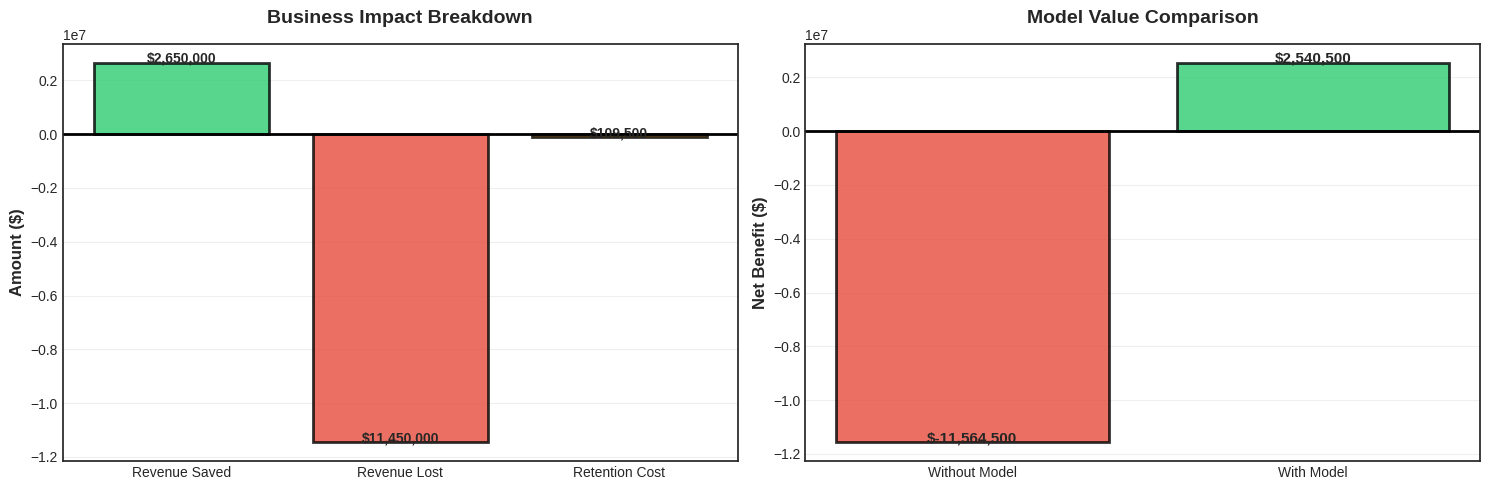

In [21]:
print("\n" + "=" * 70)
print("BUSINESS IMPACT ANALYSIS")
print("=" * 70)

# Assumptions for business impact
avg_customer_value = 50000  # Average account balance
retention_cost = 500        # Cost to retain one customer
retention_success_rate = 0.3  # 30% of retention efforts succeed

# Calculate business metrics
tn, fp, fn, tp = cm.ravel()

# Costs and Savings
saved_customers = int(tp * retention_success_rate)
retention_spending = (tp + fp) * retention_cost
revenue_saved = saved_customers * avg_customer_value
lost_revenue = fn * avg_customer_value
net_benefit = revenue_saved - retention_spending

print(f"\nBusiness Metrics (Based on Test Set):")
print(f"\nRevenue Impact:")
print(f"   Customers correctly identified as churning: {tp}")
print(f"   Potential customers saved (30% success): {saved_customers}")
print(f"   Revenue saved: ${revenue_saved:,.0f}")
print(f"   Revenue lost (missed churners): ${lost_revenue:,.0f}")

print(f"\nCost Analysis:")
print(f"   Retention campaigns sent: {tp + fp}")
print(f"   Total retention spending: ${retention_spending:,.0f}")

print(f"\nNet Business Impact:")
print(f"   Net Benefit: ${net_benefit:,.0f}")
print(f"   ROI: {(net_benefit/retention_spending)*100:.1f}%")

# Visualize business impact
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Impact breakdown
impact_categories = ['Revenue Saved', 'Revenue Lost', 'Retention Cost']
impact_values = [revenue_saved, -lost_revenue, -retention_spending]
impact_colors = ['#2ecc71', '#e74c3c', '#f39c12']

axes[0].bar(impact_categories, impact_values, color=impact_colors, 
            edgecolor='black', linewidth=2, alpha=0.8)
axes[0].axhline(y=0, color='black', linewidth=2)
axes[0].set_ylabel('Amount ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Business Impact Breakdown', fontsize=14, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(impact_values):
    axes[0].text(i, v + (1000 if v > 0 else -5000), f'${abs(v):,.0f}', 
                ha='center', fontweight='bold', fontsize=10)

# Net benefit visualization
categories = ['Without Model', 'With Model']
without_model = -lost_revenue - fn * retention_cost  # Lose all churners
with_model = net_benefit

axes[1].bar(categories, [without_model, with_model], 
            color=['#e74c3c', '#2ecc71'], edgecolor='black', linewidth=2, alpha=0.8)
axes[1].axhline(y=0, color='black', linewidth=2)
axes[1].set_ylabel('Net Benefit ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Model Value Comparison', fontsize=14, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate([without_model, with_model]):
    axes[1].text(i, v + (2000 if v > 0 else -8000), f'${v:,.0f}', 
                ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('9_business_impact.png', dpi=300, bbox_inches='tight')
plt.show()